# Visualise GRACE data:

In [1]:
import matplotlib.pyplot as plt
import torch

from grace.models.datasets import dataset_from_graph
from grace.models.feature_extractor import FeatureExtractor

from grace.io.image_dataset import ImageGraphDataset
from grace.evaluation.process import generate_ground_truth_graph
from grace.visualisation.subgraph import (
    plot_subgraph_geometry, 
    plot_local_node_geometry
)
from grace.visualisation.plotting import (
    display_image_and_grace_annotation, 
    read_patch_stack_by_label, 
    montage_from_image_patches, 
    overlay_from_image_patches,
    plot_simple_graph,
    plot_connected_components
)

/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torch_geometric/typing.py:18: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: dlopen(/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/libpyg.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <B5FD9895-F13C-386E-85C3-E2998159857E> /Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/libpyg.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torch/lib/libc10.dylib
  warnings.warn(f"An issue occurred while imp

### Visualise the overlay of annotated graph on image annotation mask:

In [2]:
bbox_size = (224, 224)
extractor_filename = "/Users/kulicna/Desktop/classifier/extractor/resnet152.pt"
pre_trained_resnet = torch.load(extractor_filename)
feature_extractor = FeatureExtractor(model=pre_trained_resnet, bbox_size=bbox_size)


In [3]:
grace_path = "/Users/kulicna/Desktop/dataset/shape_stars/infer"
dataset = ImageGraphDataset(
    image_dir=grace_path, 
    grace_dir=grace_path, 
    transform=feature_extractor,
)
image, graph_data = dataset[0]
graph = graph_data["graph"]
graph.number_of_nodes(), graph.number_of_edges()


09/19/2023 11:55:59 AM MRC_Synthetic_File_006
09/19/2023 11:55:59 AM Nodes count | [56, 96, 37] x | [29.63, 50.79, 19.58] %
09/19/2023 11:55:59 AM Edges count | [246, 111, 195] x | [44.57, 20.11, 35.33] %
09/19/2023 11:55:59 AM Relabelled 'Annotation.UNKNOWN'
09/19/2023 11:55:59 AM Nodes count | [93, 96, 0] x | [49.21, 50.79, 0.0] %
09/19/2023 11:55:59 AM Edges count | [441, 111, 0] x | [79.89, 20.11, 0.0] %
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for 

(189, 552)

### Generate ground truth graph:

In [4]:
gt_graph = generate_ground_truth_graph(graph)
gt_graph.number_of_nodes(), gt_graph.number_of_edges()


(189, 111)

### Display the annotation:

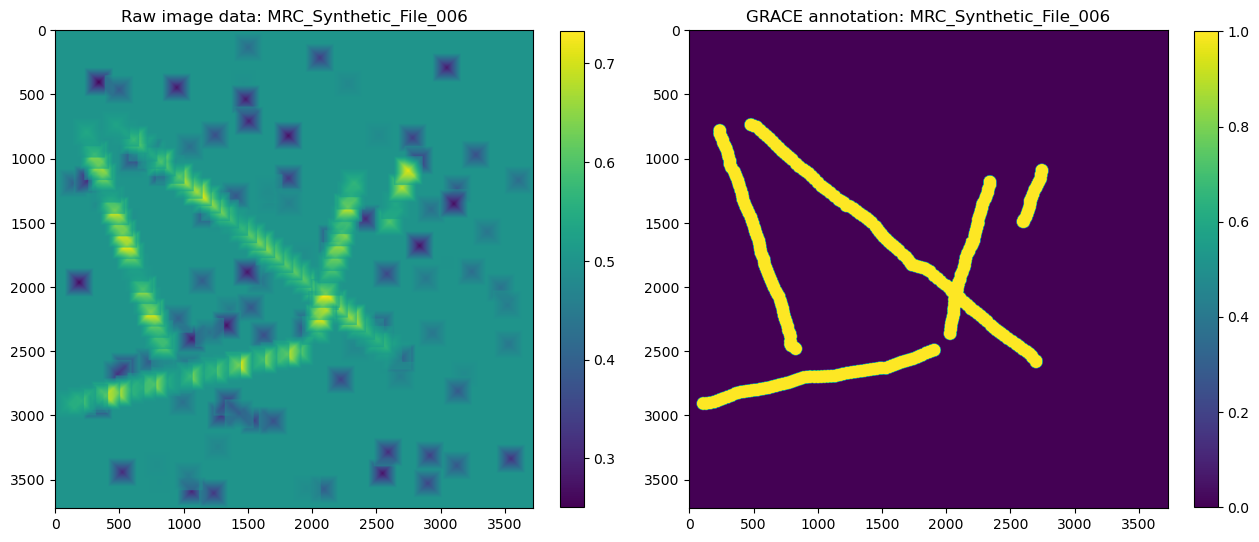

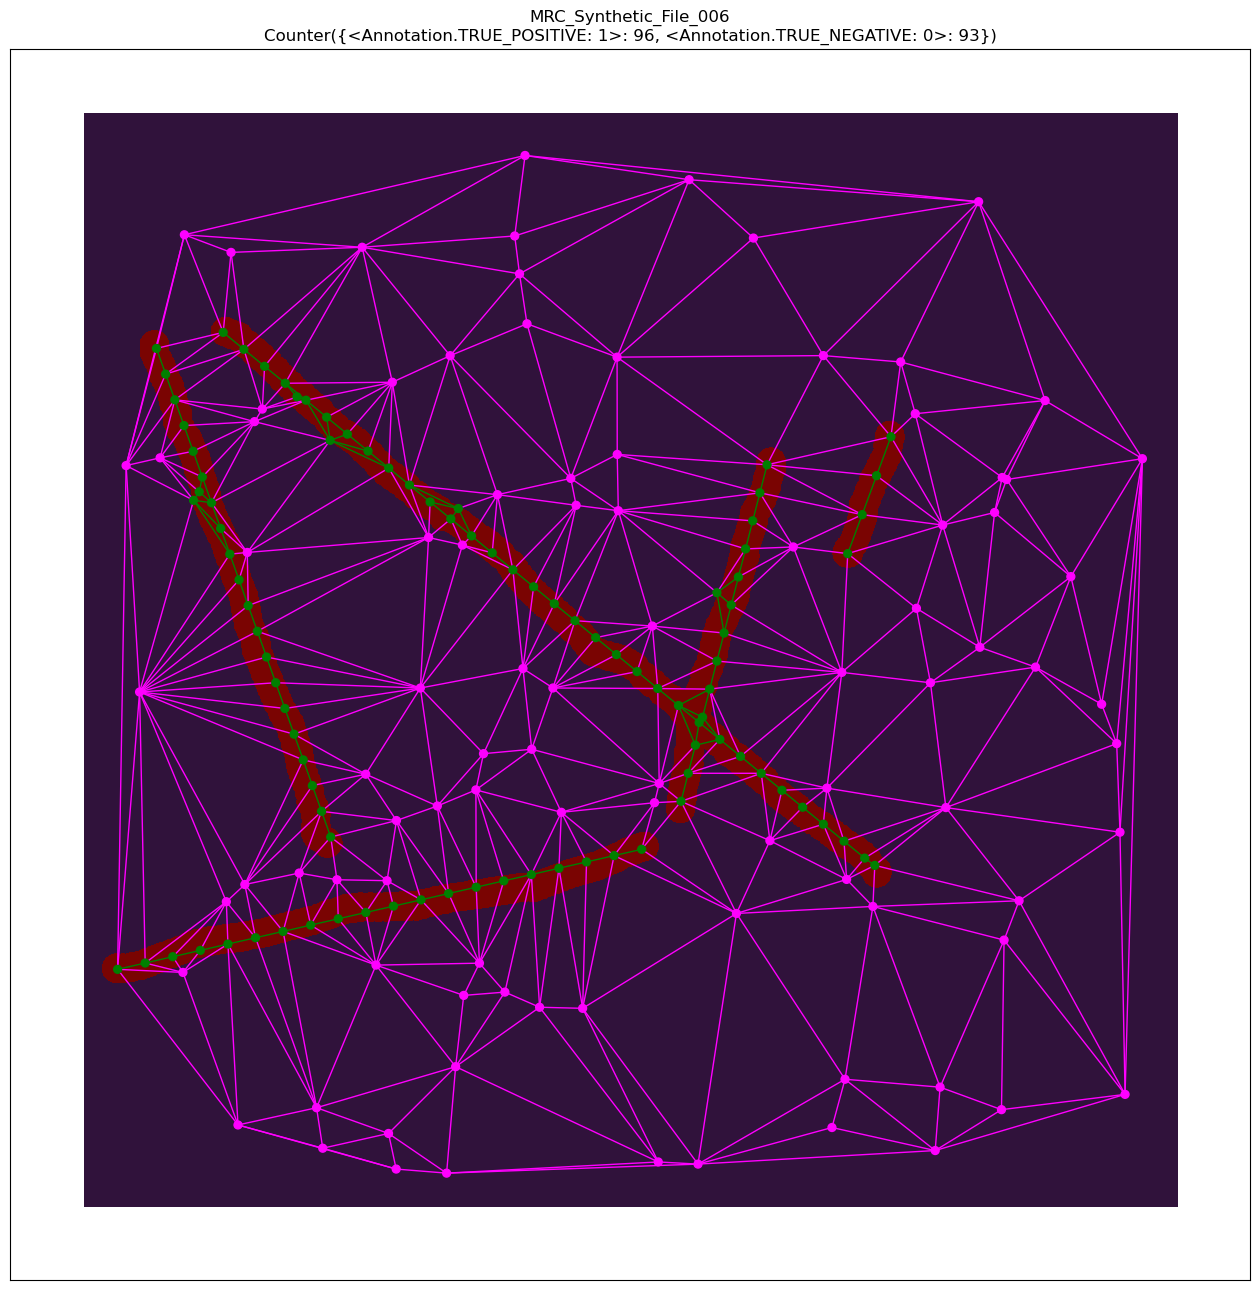

In [5]:
display_image_and_grace_annotation(image=image, target=graph_data)

### Visualise the crops montages & overlay:

In [6]:
crops = read_patch_stack_by_label(G=graph_data["graph"], image=image, crop_shape=bbox_size)
[len(c) for c in crops]

[93, 96, 0]

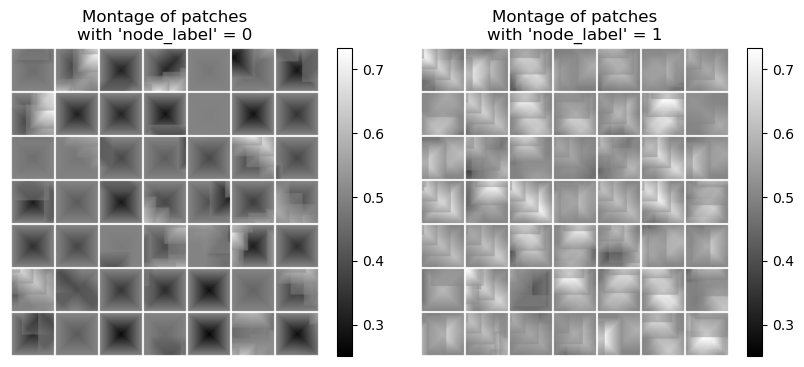

In [7]:
montage_from_image_patches(crops)

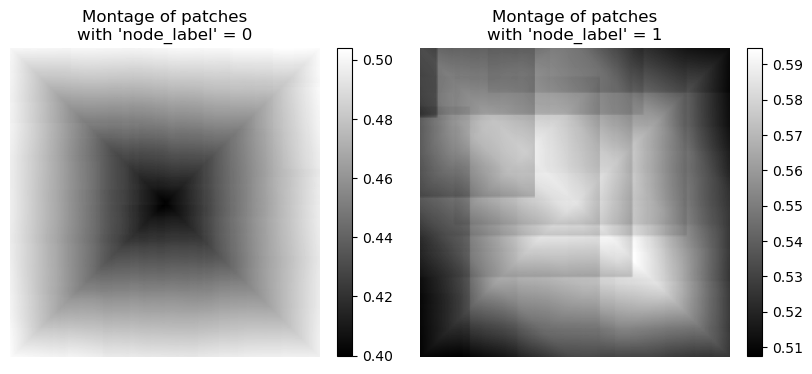

In [8]:
overlay_from_image_patches(crops)

### Draw the plain graphs:

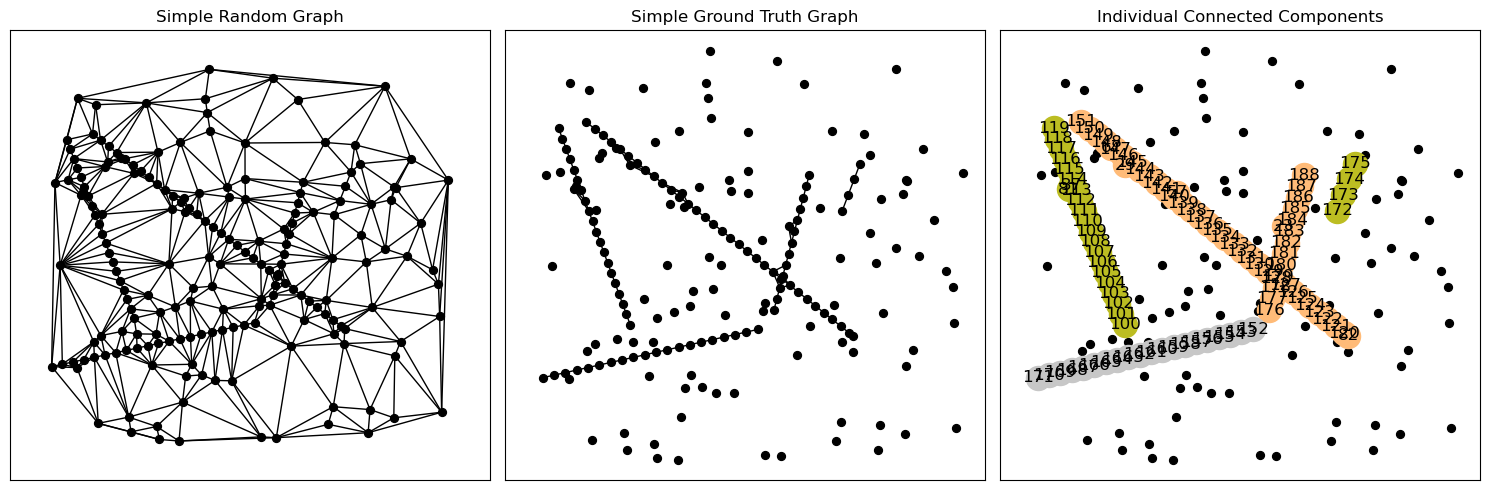

In [9]:
shape = 5
_, axes = plt.subplots(1, 3, figsize=(shape*3, shape*1))

plot_simple_graph(graph, title=f"Simple Random Graph", ax=axes[0])
plot_simple_graph(gt_graph, title=f"Simple Ground Truth Graph", ax=axes[1])
plot_connected_components(gt_graph, title=f"Individual Connected Components", ax=axes[2])

plt.tight_layout()
plt.show()


### Visualise few subgraphs:

In [10]:
dataset = dataset_from_graph(graph, mode='sub', in_train_mode=True)
len(dataset), type(dataset[0])

(189, torch_geometric.data.data.Data)

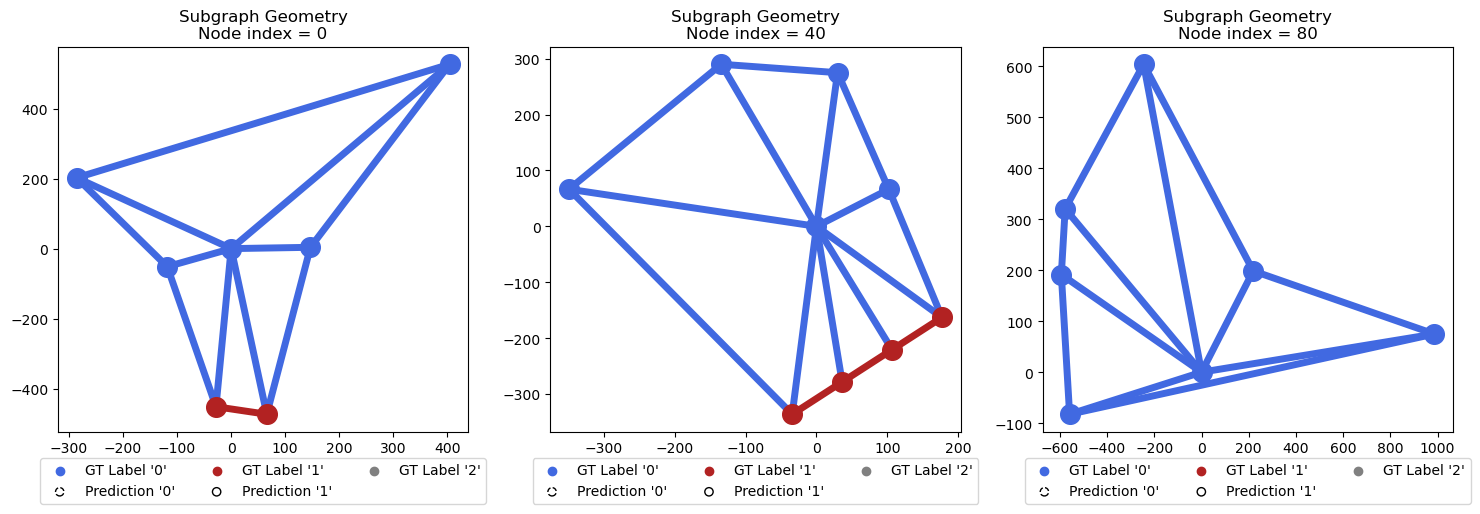

In [11]:
ncols = 3
_, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 5))
    
for sub in range(ncols):
    sub_graph = dataset[(sub+ncols)*10]
    plot_subgraph_geometry(sub_graph, title=f"Node index = {sub*40}", ax=axes[sub])
    

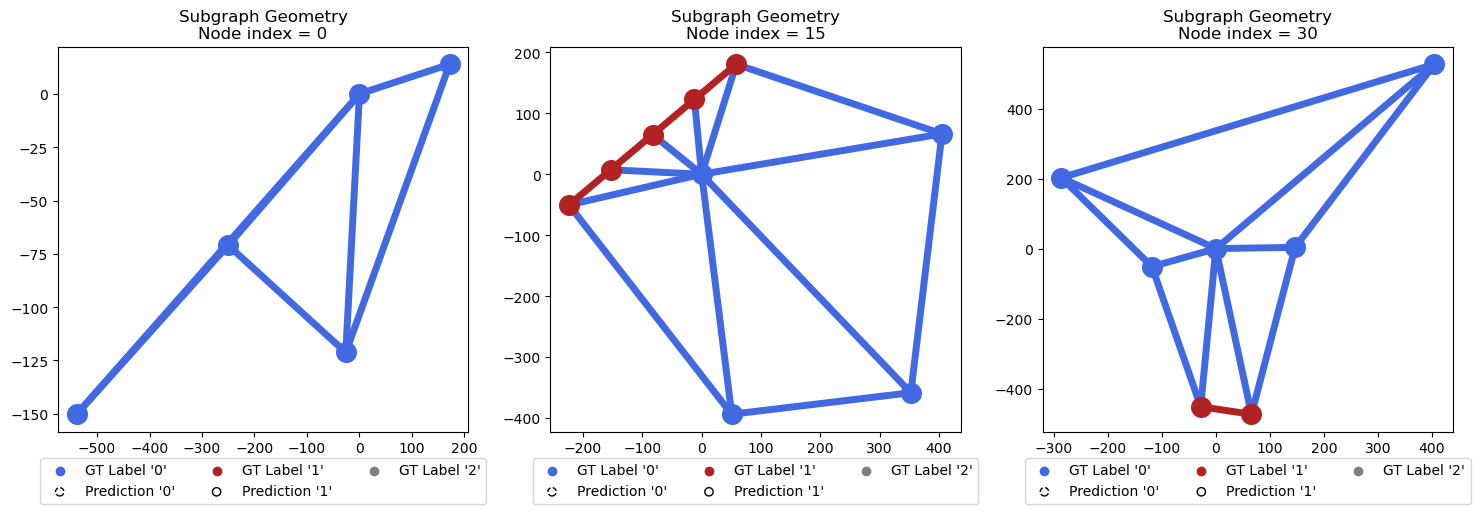

In [12]:
ncols = 3
_, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 5))
    
for sub in range(ncols):
    node_idx = sub*ncols*5
    plot_local_node_geometry(graph, node_idx=node_idx, title=f"Node index = {sub*ncols*5}", ax=axes[sub])
    

##### Done!